### ฤดูกาลมีไหม?

In [8]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [9]:
tv = TvDatafeed()

In [11]:
df = tv.get_hist(symbol='tfg',exchange='set',interval=Interval.in_monthly,n_bars=150)
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index('Date')

df.tail(5)

symbol  open  high   low  close       volume       Date
datetime                                                                     
2021-10-01 09:00:00  set:tfg  4.50  4.60  4.36   4.38   33812500.0 2021-10-01
2021-11-01 09:00:00  set:tfg  4.36  4.52  4.16   4.16   41572900.0 2021-11-01
2021-12-01 09:00:00  set:tfg  4.18  4.94  4.10   4.86   99606500.0 2021-12-01
2022-01-04 09:00:00  set:tfg  5.15  5.35  4.82   4.96  234121200.0 2022-01-04
2022-02-01 09:00:00  set:tfg  4.96  4.98  4.94   4.94     388800.0 2022-02-01

In [12]:
df['pct_change'] = np.round(df['close'].pct_change(),3)

<AxesSubplot:xlabel='Year', ylabel='Month'>

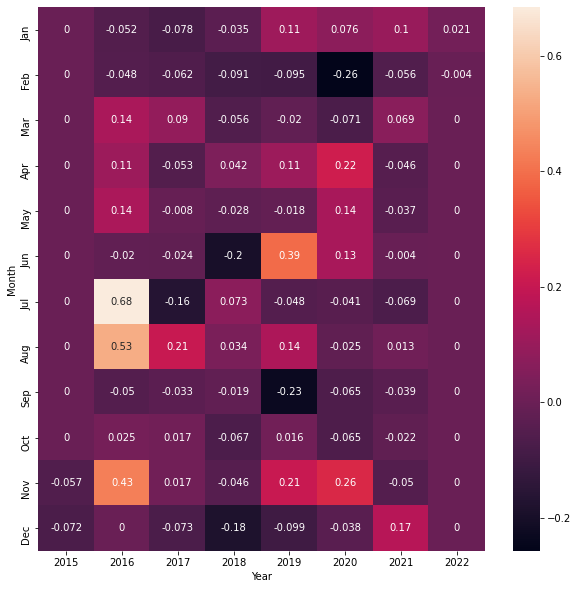

In [13]:
df["Year"] = df.Date.apply(lambda x: x.year)
df["Month"] = df.Date.apply(lambda x: x.strftime("%m"))
pt = df.pivot_table(index="Month",columns="Year",values="pct_change", aggfunc="sum").fillna(0)

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(pt, annot=True,yticklabels=months)

In [14]:
pt

Year    2015   2016   2017   2018   2019   2020   2021   2022
Month                                                        
01     0.000 -0.052 -0.078 -0.035  0.112  0.076  0.101  0.021
02     0.000 -0.048 -0.062 -0.091 -0.095 -0.257 -0.056 -0.004
03     0.000  0.137  0.090 -0.056 -0.020 -0.071  0.069  0.000
04     0.000  0.108 -0.053  0.042  0.107  0.224 -0.046  0.000
05     0.000  0.143 -0.008 -0.028 -0.018  0.136 -0.037  0.000
06     0.000 -0.020 -0.024 -0.197  0.393  0.134 -0.004  0.000
07     0.000  0.684 -0.164  0.073 -0.048 -0.041 -0.069  0.000
08     0.000  0.530  0.206  0.034  0.144 -0.025  0.013  0.000
09     0.000 -0.050 -0.033 -0.019 -0.231 -0.065 -0.039  0.000
10     0.000  0.025  0.017 -0.067  0.016 -0.065 -0.022  0.000
11    -0.057  0.433  0.017 -0.046  0.207  0.256 -0.050  0.000
12    -0.072  0.000 -0.073 -0.183 -0.099 -0.038  0.168  0.000